In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman',size=15)

In [3]:
Tref=773
lx=340
ly=150
endTime=1.92
timeStep=0.01
MCoke=12
MO2=32
pixelResolution=1e-6
YO2=0.22

## Temporal Evolution of Combustion Temperature

In [13]:
fieldminMaxFile="./fieldMinMax.dat"
with open(fieldminMaxFile,"r") as fp:
    comment=fp.readline()
    header=fp.readline()
header=header[1:-1].split()
indexs_processor=[]
for i,name in enumerate(header):
    if header[i]=="processor":
        indexs_processor.append(i)
indexs_processor.reverse()  

data=pd.read_csv(fieldminMaxFile,comment='#', sep='\t',header=None)
data=data.drop(indexs_processor,axis=1)
data.rename(columns=lambda x:header[x],inplace=True)
sampling_rate=10    
data_sampling=data[data.index%sampling_rate==0]
data_sampling.shape

(3068, 6)

In [14]:
fieldminMaxFile1="./fieldMinMax1.dat"
with open(fieldminMaxFile1,"r") as fp:
    comment1=fp.readline()
    header1=fp.readline()
header1=header1[1:-1].split()
indexs_processor1=[]
for i,name in enumerate(header1):
    if header1[i]=="processor":
        indexs_processor1.append(i)
indexs_processor1.reverse()  

data1=pd.read_csv(fieldminMaxFile1,comment='#', sep='\t',header=None)
data1=data1.drop(indexs_processor1,axis=1)
data1.rename(columns=lambda x:header1[x],inplace=True)
sampling_rate1=10    
data_sampling1=data1[data1.index%sampling_rate1==0]
data_sampling1.shape

(1200, 6)

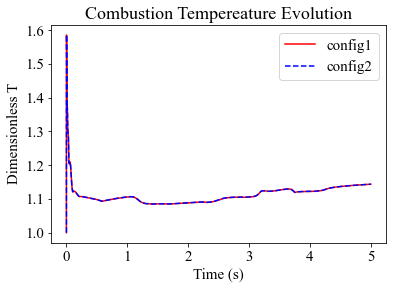

In [23]:
fig, ax = plt.subplots()
ax.plot(data["Time"],data["max"]/Tref,linestyle="-",color="r",label="config1")
ax.plot(data1["Time"],data1["max"]/Tref,linestyle="--",color="b",label="config2")
ax.set_xlabel(f"Time (s)")
ax.set_ylabel(f"Dimensionless T")
ax.set_title(f"Combustion Tempereature Evolution")
ax.legend(loc="upper right")


config1: time step 1e-5s (<0.04s), 1e-4s (<2.5s), 1e-3 (<5s) 
config2: time step 1e-5s (<0.07s),  1e-3 (<5s)